## Анализ исторических данных по продажам компьютерных игр.
### Выявление закономерностей,определяющих успешность игры и прогноз продаж.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn 
from scipy import stats
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action = "ignore", category = SettingWithCopyWarning)
warnings.filterwarnings("ignore",category=plt.cbook.mplDeprecation)

## 1) Общая информация по данным

In [2]:
# Читаем данные из файла
df = pd.read_csv('C:/Users/ZuZu/Documents/DA/Video_Games_Sales_as_at_22_Dec_2016.csv') # read_csv читает данные из csv файла
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info() # посмотрим на информацию о содержимом и типе значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
# размерность таблицы данных
df.shape

(16719, 16)

In [5]:
# количество пустых ячеек в таблице
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
# количество повторяющихся строк 
df.duplicated().sum()

0

## 2) Подготовка данных

In [7]:
# вывод названий колонок
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [8]:
# приведение названий столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

Заменим тип данных в столбце Year_of_Release  с  float на int, так как здесь указаны данные в годах:

In [9]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  Int64  
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  object 
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: Int64(1), float64(8), object(7)
memory usage: 2.1+ MB


In [10]:
# количество пустых данных в столбце года выпуска игр
df['year_of_release'].isna().sum()

269

Заполним пустые ячейки в столбце year_of_release там, где совпадают названия игр разных платформ:


In [11]:
lst = df.loc[df['year_of_release'].isnull() == True].index.tolist()
for j in lst:
    df['year_of_release'][j] = df.loc[df['name'] == df['name'][j], 'year_of_release'].min()
df['year_of_release'].isna().sum()

146

Аббревиатура tbd расшифровывается как to be determined. Вероятно, это данные не заполнены из-за того что не были точно определены рейтингом, поэтому заменим tbd на nan.

In [12]:
#Заменим tbd на nan
print('до замены: ',df['user_score'].isna().sum())
df['user_score'].loc[df['user_score']=='tbd'] = np.nan
df['user_score'] = df['user_score'].astype('float64')
print('после замены: ', df['user_score'].isna().sum())

до замены:  6704
после замены:  9129


## 3) Анализ данных

Количество выпущенных игр по годам

Text(0, 0.5, 'количество выпущенных игр')

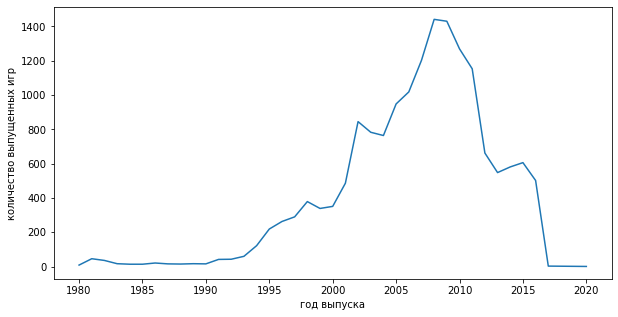

In [13]:
games_difyears = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
#print(games_ondifyears)
plt.figure(figsize=(10,5))
plt.plot(games_difyears)
plt.xlabel("год выпуска")
plt.ylabel("количество выпущенных игр")

In [14]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Из графика видно, что в период с 1980 по 1990 игр было мало, в период с 1990 по 2008 виден актив рост производства игр. Далее с 2008 года наблюдается резкий спад выпуска игр.

Text(0, 0.5, 'Суммарное количество продаж')

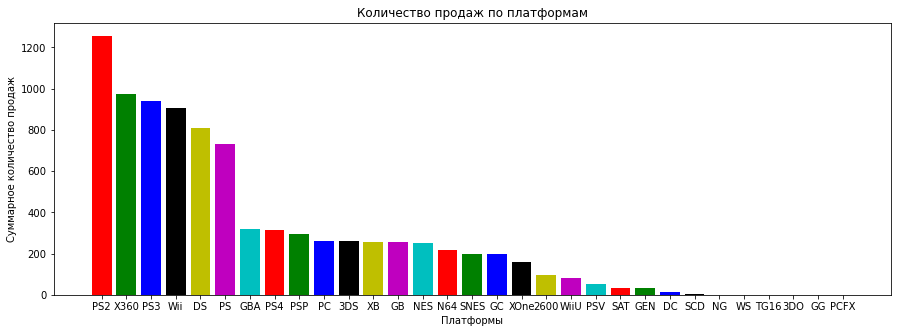

In [15]:
GlobSalesPlatform = df.pivot_table(index = 'platform', values = 'global_sales', aggfunc ='sum')
GlobSalesPlatform = GlobSalesPlatform.sort_values(by='global_sales', ascending=False)

my_colors = 'rgbkymc'
plt.figure(figsize=(15,5))
plt.bar(GlobSalesPlatform.index, GlobSalesPlatform['global_sales'], color = my_colors)
plt.title("Количество продаж по платформам")
plt.xlabel("Платформы")
plt.ylabel("Суммарное количество продаж")

Из данной гистограммы видно, что наибольшие суммарные продажы были у следующих платформ: PS2, X360, PS3, Wii, DS, PS

**Для дальнейшего анализа обрежем фрейм данных с 2004 года.**

In [16]:
df.set_index(df['year_of_release'],inplace = True)
df = df.sort_index(ascending=True)
df = df.iloc[df.index >= 2005]
df.reset_index(drop=True,inplace=True)
df

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Full Spectrum Warrior,PS2,2005,Strategy,THQ,0.15,0.11,0.00,0.04,0.30,74.0,24.0,8.0,13.0,Pandemic Studios,M
1,Madden NFL 06,PS2,2005,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91,88.0,29.0,8.0,121.0,EA Sports,E
2,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,83.0,32.0,8.8,29.0,EA Canada,T
3,Tekken 5,PS2,2005,Fighting,Namco Bandai Games,0.93,1.94,0.31,0.70,3.87,88.0,62.0,8.6,229.0,Namco,T
4,Pump It Up: Exceed,PS2,2005,Misc,Mastiff,0.03,0.02,0.00,0.01,0.06,73.0,28.0,8.4,11.0,Andamiro U.S.A. Corp.,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11359,Toukiden 2,PS4,2016,Action,Tecmo Koei,0.00,0.00,0.08,0.00,0.08,NaN,NaN,NaN,NaN,Koei Tecmo Games,NaN
11360,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
11361,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
11362,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# основные 5 лидирующих платформ
main_platforms = df.pivot_table(index = 'platform', values = 'global_sales', aggfunc='sum')
main_platforms=main_platforms.sort_values(by='global_sales', ascending=False).head(5)
plt_lst = main_platforms.index.tolist()
plt_lst

['X360', 'PS3', 'Wii', 'DS', 'PS2']

Функция распределения продаж каждой из 5 платформ по годам:

In [18]:
def pivot_table(name_plt):
    this_df = df.loc[(df['platform'] == name_plt) & (df['year_of_release'] > 2004)]   #2004
    res = this_df.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return res

Построим график распределения продаж каждой из 5 платформ по годам:

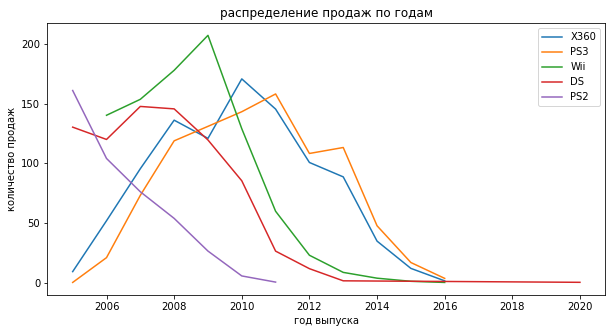

In [19]:
plt.figure(figsize=(10,5))
for i in plt_lst: 
    dd = pivot_table(i)
    plt.plot(dd,label=i)
plt.title('распределение продаж по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество продаж')
plt.legend()
plt.show()

Из графика видно, что в среднем игровые платформы существуют около 10-15  лет, пик продаж наступает через 3-5 лет. Дольше всех просуществовала пластформа PS3 - 15 лет; Меньше всех - WII,10 лет, у него был резкий рост продаж в 2009, но сражу же произошел резких спад.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по основным 5 платформам**

In [20]:
main_platforms = df[df['platform'].isin(plt_lst)]
print(main_platforms['global_sales'].describe())
main_platforms = main_platforms[main_platforms['global_sales']<1.5]
main_platforms['global_sales'].describe()

count    7046.000000
mean        0.570616
std         1.836144
min         0.010000
25%         0.070000
50%         0.180000
75%         0.490000
max        82.530000
Name: global_sales, dtype: float64


count    6517.000000
mean        0.282342
std         0.316071
min         0.010000
25%         0.060000
50%         0.160000
75%         0.390000
max         1.490000
Name: global_sales, dtype: float64

Text(0, 0.5, 'количество продаж')

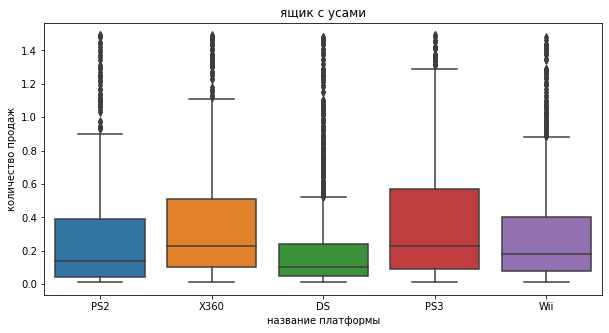

In [21]:
plt.figure(figsize=(10,5))
seaborn.boxplot(data=main_platforms, x='platform', y='global_sales')

plt.title('ящик с усами')
plt.xlabel('название платформы')
plt.ylabel('количество продаж')

Из графика видно, что медианы у платформ разные. Количество продаж распределяются в следующим убывающем порядке: PS3, X360, WII, PS2, DS.

Проанализируем влияние на продажи отзовов пользователей и критиков.

In [22]:
dfps3 = df.loc[df['platform'] == 'PS3']

us = dfps3['user_score'].corr(dfps3['global_sales'])
cs = dfps3['critic_score'].corr(dfps3['global_sales'])
print(us,cs)

0.1273157179775808 0.43260428475213464


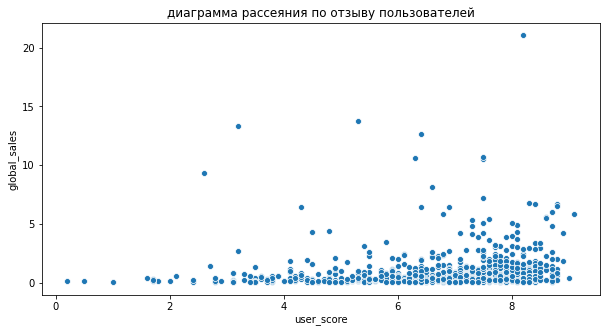

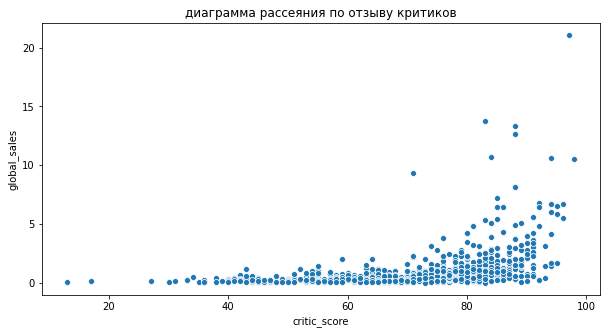

In [23]:
# построим диаграмму рассеяния по отзыву пользователей
plt.figure(figsize=(10,5))
plt.title('диаграммa рассеяния по отзыву пользователей')
seaborn.scatterplot(data=dfps3, x='user_score',y='global_sales')

# построим диаграмму рассеяния по отзыву критиков
plt.figure(figsize=(10,5))
plt.title('диаграммa рассеяния по отзыву критиков')
seaborn.scatterplot(data=dfps3, x='critic_score',y='global_sales')

X360


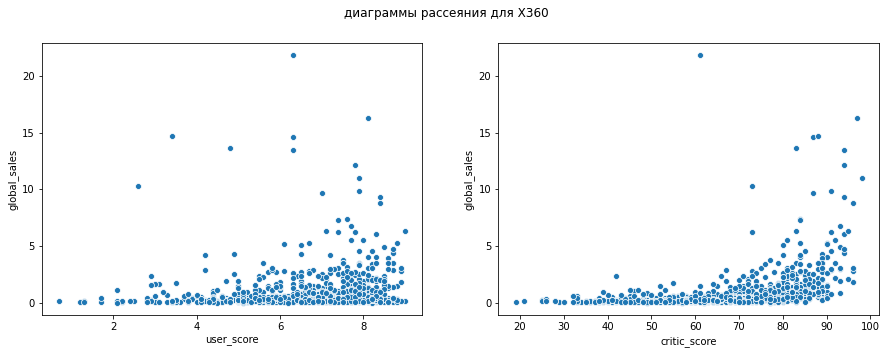

значение корреляции между платформой и отзывами пользователей: 0.11363600367908684.
значение корреляции между платформой и отзывами пользователей: 0.3917346873719011.
PS3


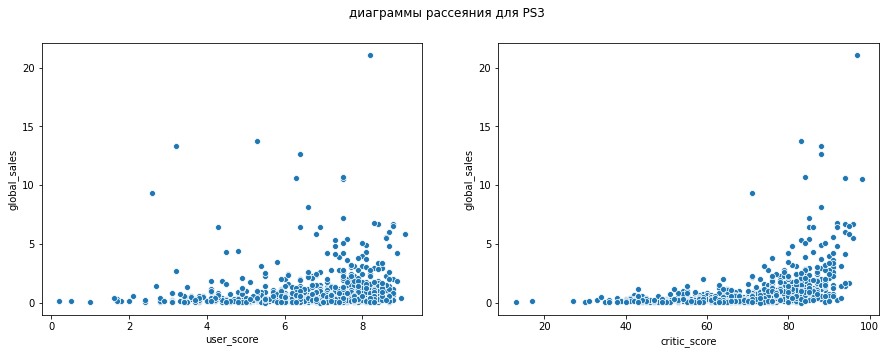

значение корреляции между платформой и отзывами пользователей: 0.1273157179775808.
значение корреляции между платформой и отзывами пользователей: 0.43260428475213464.
Wii


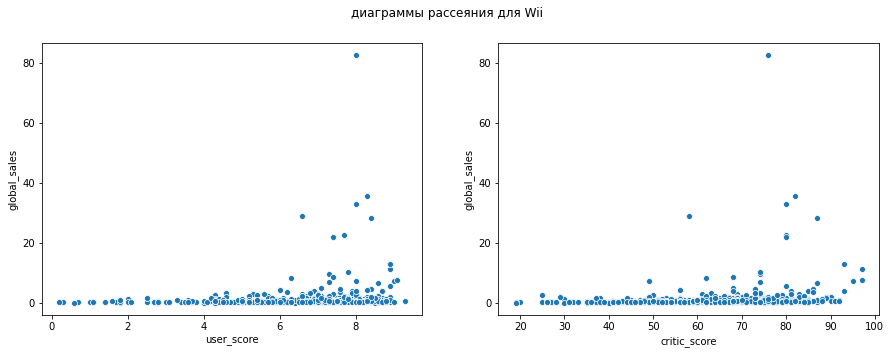

значение корреляции между платформой и отзывами пользователей: 0.11346952433778988.
значение корреляции между платформой и отзывами пользователей: 0.17789403963567801.
DS


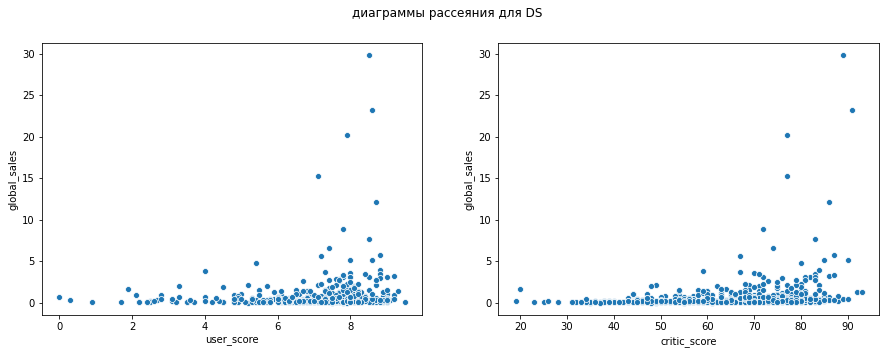

значение корреляции между платформой и отзывами пользователей: 0.13204982715820998.
значение корреляции между платформой и отзывами пользователей: 0.23816644164843565.
PS2


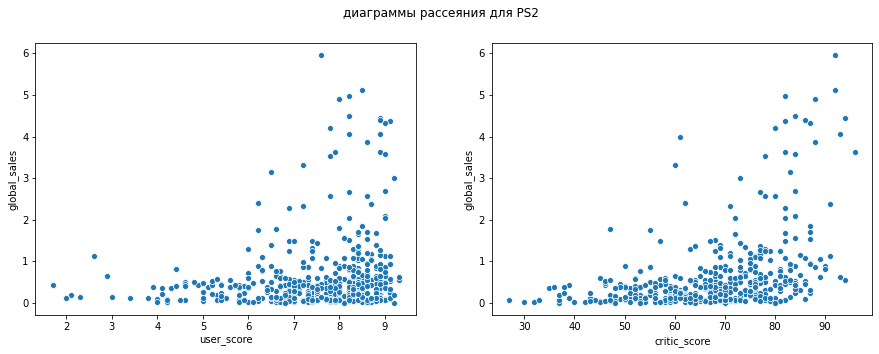

значение корреляции между платформой и отзывами пользователей: 0.18781477432463003.
значение корреляции между платформой и отзывами пользователей: 0.42186381275122853.


In [24]:
def all_plt_corr(name):
    test_df = df.loc[df['platform'] == name]
    us = test_df['user_score'].corr(test_df['global_sales'])
    cs = test_df['critic_score'].corr(test_df['global_sales'])
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    fig.suptitle(f'диаграммы рассеяния для {name}')
    seaborn.scatterplot(data=test_df, x='user_score',y='global_sales', ax=ax[0])
    seaborn.scatterplot(data=test_df, x='critic_score',y='global_sales', ax=ax[1])
    plt.show()
    print(f'значение корреляции между платформой и отзывами пользователей: {us}.')
    print(f'значение корреляции между платформой и отзывами пользователей: {cs}.')
for i in plt_lst:
    print(i)
    all_plt_corr(i)

Исходя из полученных данных, можно сказать, что существует корреляция платформ с оценками пользователей и критиков. Корреляция платформ с оценками пользователей слабее, чем корреляция с оценками критиков. Т.е. отзывы критиков имеют большее значение для покупателей игр.

Рассмотрим общее распределение игр по жанрам.

Text(0.5, 1.0, 'распределение игр по жанрам')

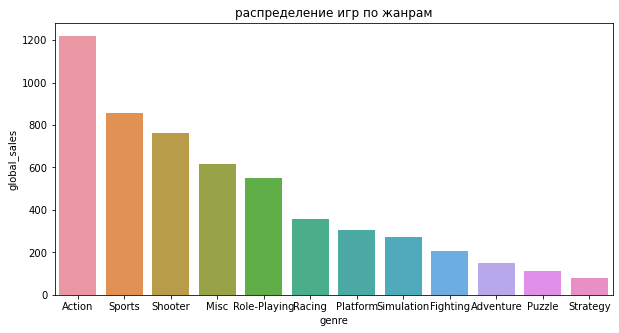

In [25]:
all_genre = df.pivot_table(index='genre', values='global_sales', aggfunc='sum')
all_genre = all_genre.sort_values(by='global_sales', ascending=False)
plt.figure(figsize=(10,5))
seaborn.barplot(data=all_genre, x=all_genre.index, y='global_sales')
plt.title('распределение игр по жанрам')

Из графика видно, что наиболее популярными игровыми жанрами являются: экшн, спортивные, стрелялки.

**Общий вывод по анализу данных:**
* Игровые платформы были созданы в 1980-х годах и оставались популярными до появления большого количества мобильных приложений в 2008 году;
- В среднем игровые платформы существуют около 10-15 лет, пик продаж наступает через 3-5 лет. 
- Наибольшие суммарные продажы были у следующих платформ: PS2, X360, PS3, Wii, DS, PS.
- Наиболее популярными игровыми жанрами являются: экшн, спортивные, стрелялки. А развивающие стратегически игры занимают последнее место в списке востребованных игровых жанров.
- Для всех платформ существует корреляция с оценками пользователей и критиков. Корреляция платформ с оценками пользователей слабее, чем корреляция с оценками критиков. Т.е. отзывы критиков имеют большее значение для покупателей игр.


## 4) Портрет пользователя каждого региона

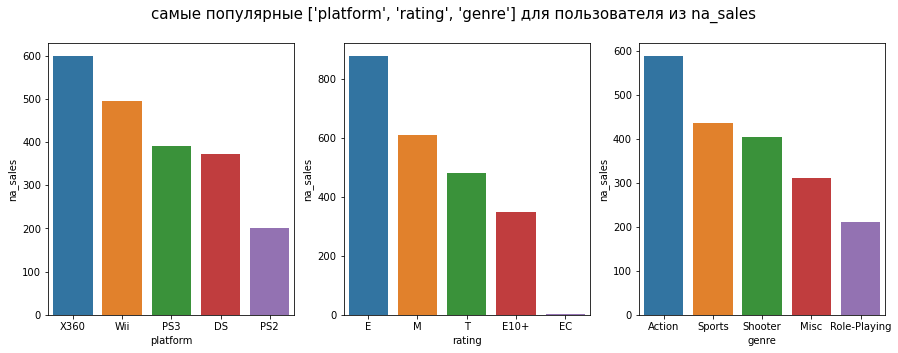

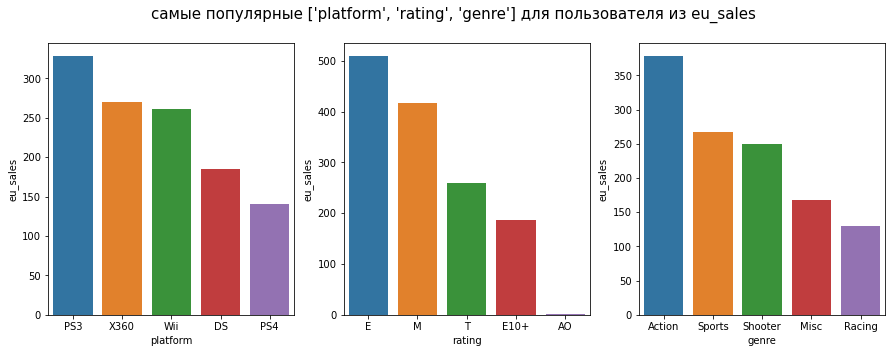

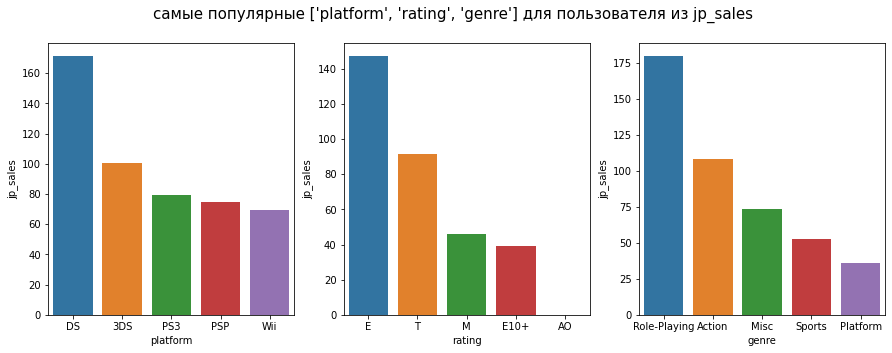

In [26]:
def reg_pivottable(name):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    tt = f'самые популярные {lst} для пользователя из {name}'
    for i in range(len(lst)):
        this_df = df.pivot_table(index = lst[i], values = name, aggfunc = 'sum')
        this_df = this_df.sort_values(by = name, ascending = False).head(5).reset_index()
        #print(this_df)
#         print('-'*25)
        seaborn.barplot(data = this_df, x = lst[i], y = name, ax=ax[i])
        fig.suptitle(tt, fontsize=15)
    plt.show()

lst=['platform','rating','genre']
for i in ['na_sales','eu_sales','jp_sales']:
    reg_pivottable(i)

**Выводы:**

**портрет пользователя NA:**
    - самыми популярными платформами для пользователя NA являются: X360, WII, PS3, DS, PS2;
    - самые популярные жанры: actions, sports, shooter, misc, role-playing;
    - основные продажи относятся к играм с рейтингом:
        - "для всех"  («Everyone»), 
        - "для взрослых" («Mature»),
        - "для подростков" («Teen»),
        - "для всех старше 10 лет"  («Everyone 10 and older»),
        - "для детей младшего возраста" («Early childhood»).
        
**портрет пользователя EU:**
    - самыми популярными платформами для пользователя NA являются:PS3, X360, WII, DS, PS4;
    - самые популярные жанры: actions, sports, shooter, misc, racing;
    - основные продажи относятся к играм с рейтингом:
        - "для всех"  («Everyone»), 
        - "для взрослых" («Mature»),
        - "для подростков" («Teen»),
        - "для всех старше 10 лет"  («Everyone 10 and older»),
        - "только для взрослых" («Adults Only 18+»).
        
**портрет пользователя JP:**
    - самыми популярными платформами для пользователя NA являются: DS, 3DS, PS3, PSP, WII;
    - самые популярные жанры: role-playing, actions, misc, sports, platform;
    - основные продажи относятся к играм с рейтингом:
        - "для всех"  («Everyone»), 
        - "для подростков" («Teen»),
        - "для взрослых" («Mature»),
        - "для всех старше 10 лет"  («Everyone 10 and older»),
        - "только для взрослых" («Adults Only 18+»)

## 5) Проверка гипотез

Поверим следующие гипотезы:
- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [27]:
#print(df['platform'].unique())
one_df = df[(df['platform'] == 'XOne') ]['user_score']
pc_df = df[(df['platform'] == 'PC')]['user_score']

print('средний рейтинг ONE: ', one_df.mean())
print('средний рейтинг PC: ', pc_df.mean())

средний рейтинг ONE:  6.521428571428572
средний рейтинг PC:  6.88961832061069


In [28]:
alpha = 0.05
res = stats.ttest_ind(one_df.dropna(), pc_df.dropna(), equal_var=False)
print(res.pvalue)


0.0020045600753560377


**Вывод:**
значение p_value меньше 1%, т.е. нулевая гипотеза ошибочна, следовательно средние пользовательские рейтинги платформ Xbox One и PC разные.

Поверим следующие гипотезы:
- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [29]:
#print(df['genre'].unique())
action_df = df[(df['genre'] == 'Action') ]['user_score']
sports_df = df[(df['genre'] == 'Sports')]['user_score']

print('средний рейтинг action: ', action_df.mean())
print('средний рейтинг sports: ', sports_df.mean())

средний рейтинг action:  6.948213081591363
средний рейтинг sports:  6.5383507853403176


In [30]:
alpha = 0.05
res = stats.ttest_ind(action_df.dropna(), sports_df.dropna(), equal_var=False)
print(res.pvalue)

3.5057406183830912e-09


**Вывод:**
значение p_value меньше 1%, т.е. нулевая гипотеза ошибочна,  следовательно cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## 6) прогноз суммарных продаж на 2017 год

In [31]:
import statsmodels.formula.api as sm

In [32]:
dff=df.loc[df['critic_score'].isna()==False]
df1 = dff.groupby('platform').get_group('PS4')
df1=df1[df1['year_of_release'] >= 2015]
df1.reset_index(inplace=True,drop=True)
df1.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,One Piece: Pirate Warriors 3,PS4,2015,Action,Namco Bandai Games,0.09,0.22,0.10,0.06,0.46,74.0,34.0,7.4,118.0,Omega Force,T
1,Grand Ages: Medieval,PS4,2015,Strategy,Kalypso Media,0.00,0.05,0.02,0.01,0.07,64.0,10.0,7.1,12.0,Gaming Minds Studios,T
2,The Book of Unwritten Tales 2,PS4,2015,Adventure,Nordic Games,0.00,0.06,0.00,0.01,0.07,63.0,9.0,8.6,7.0,KING Art,NaN
3,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,0.03,0.00,0.03,0.01,0.07,78.0,33.0,8.1,63.0,Spike Chunsoft,T
4,Fairy Fencer F: Advent Dark Force,PS4,2015,Role-Playing,Idea Factory International,0.02,0.00,0.05,0.00,0.07,71.0,21.0,6.2,34.0,Compile Heart,T


In [33]:
table1 = df1.loc[df1['genre'] == 'Action'][['genre','na_sales', 'eu_sales', 'jp_sales',
                                                 'other_sales', 'global_sales', 'critic_score']]
result_action = sm.ols(formula="global_sales ~ na_sales+eu_sales+jp_sales+other_sales\
                      +critic_score",  data=table1).fit()

result_action.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           global_sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.391e+05
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.86e-128
Time:                        21:44:11   Log-Likelihood:                 236.81
No. Observations:                  64   AIC:                            -461.6
Df Residuals:                      58   BIC:                            -448.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0026      0.006      0.465      0.644      -0.009       0.014
na_sales         1.1256      0.060     18.913      0.000       1.006       1.245
eu_sales         1.0933      0.043     25.381      0.000       1.007       1.180
jp_sales         0.9922      0.014     72.351      0.000       0.965       1.020
other_sales      0.4455      0.257      1.735      0.088      -0.069       0.960
critic_score -8.907e-06   8.17e-05     -0.109      0.914      -0.000       0.000
==============================================================================
Omnibus:                        2.240   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.961
Skew:                          -0.312   Prob(JB):                        0.375
Kurtosis:                       2.412   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
s=50
ss=table1.shape[0] - s
x_train,y_train = table1['critic_score'][:s].tolist(), table1['global_sales'][:s].tolist()# обучающие вход и желаемый выход
x_test, y_test = table1['critic_score'][s:].tolist(), table1['global_sales'][s:].tolist()# тестовые вход и желаемый выход

coefficient of determination: 0.19985843280102722
intercept: -1.8874360712253568
slope: [0.03464521]
0.14719225077797227 1.181166026670716


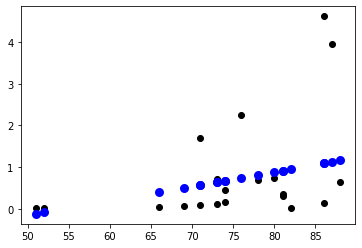

In [35]:
import math
from sklearn.linear_model import LinearRegression
X = np.array(table1['critic_score'].tolist()).reshape((-1, 1)) # в поле data - примеры входов, вектора
y = np.array(table1['global_sales'].tolist()) # Указания учителя = номера классов
from sklearn.model_selection import train_test_split # подключаем функцию для разделения данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # и отдаем 30% на тест, остальное на обучение
model = LinearRegression().fit(X_train,  y_train)
r_sq = model.score(X_train,  y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
r2_score = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(r2_score,rmse)#
plt.scatter(X_test.flatten(), y_test,  color='black')# строим желаемые выходы 
plt.scatter(X_test.flatten(), y_pred, color='blue', linewidth=3)# и рассчитанный

In [36]:
df2=df[['platform','genre','na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score']]
df2

,platform,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score
0,PS2,Strategy,0.15,0.11,0.00,0.04,0.30,74.0
1,PS2,Sports,3.98,0.26,0.01,0.66,4.91,88.0
2,XB,Racing,0.53,0.46,0.00,0.05,1.04,83.0
3,PS2,Fighting,0.93,1.94,0.31,0.70,3.87,88.0
4,PS2,Misc,0.03,0.02,0.00,0.01,0.06,73.0
...,...,...,...,...,...,...,...,...
11359,PS4,Action,0.00,0.00,0.08,0.00,0.08,NaN
11360,PS4,Role-Playing,0.00,0.00,0.04,0.00,0.04,NaN
11361,PSV,Role-Playing,0.00,0.00,0.01,0.00,0.01,NaN
11362,PSV,Action,0.00,0.00,0.01,0.00,0.01,NaN


In [37]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:,:].values
y = df2.iloc[:, 6:7].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

games_in_training_set = X_train[:, 0]
games_in_test_set = X_test[:, 0]
# Dropping the column that contains the name of the games
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

<ipython-input-38-08745ebea93f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t7=df1[df1['genre'] == 'Shooter'].append(df2[df2['genre'] == 'Shooter'])


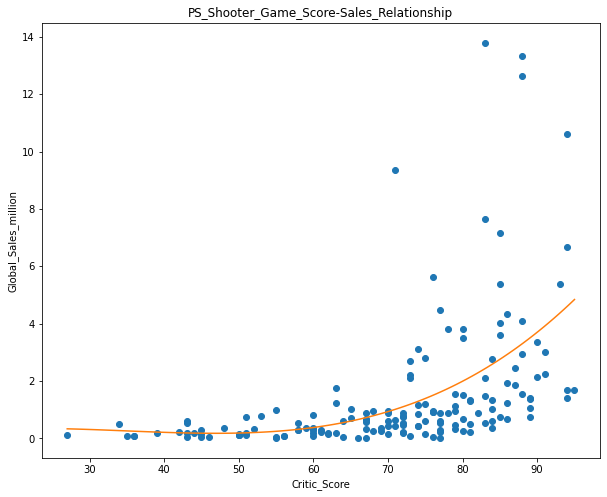

In [38]:
#Проверка влияния оценок критиков на высокие продажи экшн игр и спортивных игр 

df1 = dff.groupby('platform').get_group('PS4')
df2 = dff.groupby('platform').get_group('PS3')
t7=df1[df1['genre'] == 'Shooter'].append(df2[df2['genre'] == 'Shooter'])

t8=t7[pd.notnull(t7['critic_score'])]
array1=t8['critic_score'].values
array2=t8['global_sales'].values

z=np.polyfit(x=array1,y=array2,deg=3)
f=np.poly1d(z)
x_new = np.linspace(array1.min(), array1.max(), 100)
y_new = f(x_new)
plt.figure(figsize=(10,8))
plt.plot(array1, array2,'o',x_new,y_new)

plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales_million")
plt.title("PS_Shooter_Game_Score-Sales_Relationship")
plt.show()

оценка критиков положительно влияет на количество продаж

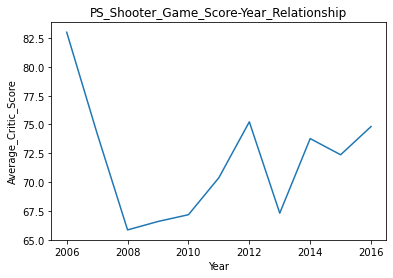

In [39]:
table1=t8[['year_of_release','critic_score']].groupby(['year_of_release']).mean().reset_index()
array1 = table1['year_of_release'].values
array2 = table1['critic_score'].values
plt.plot(array1,array2)
plt.xlabel("Year")
plt.ylabel("Average_Critic_Score")
plt.title("PS_Shooter_Game_Score-Year_Relationship")
plt.show()